## Smoothing splines

In fitting a smooth spline to a set of data, what we really want to do is find some function $g(x)$ that fits the obsereved data well. This can easily lead to overfitting since any $g$ that interpolates the data will minimize the usual RSS. 

Therefore, we introduce a penalty term: $\lambda \int g''(t)^2dt$. This ensures that the curve is smooth while not overfitting the data.

$$\text{RSS} := \sum (y_i - g(x_i))^2 + \lambda \int g''(t)^2dt$$

$\lambda$ is often called the _smoothing parameter_.

The tuning parameter $\lambda$ controls the smoothness of the model. It effectively controls of the degree of freedom of the spline. As $\lambda$ increases from $0$ to $\infty$, the _effective degrees of freedom_ $df_{\lambda}$ decreases form $n$ to $2$.

Smoothing splines are a special case of the broader set of methods called Generalized Additive Models (GAMs).

Excellent video from the author of the `pyGAM` package explaining GAMs: https://www.youtube.com/watch?v=XQ1vk7wEI7c

In [17]:
import numpy as np
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

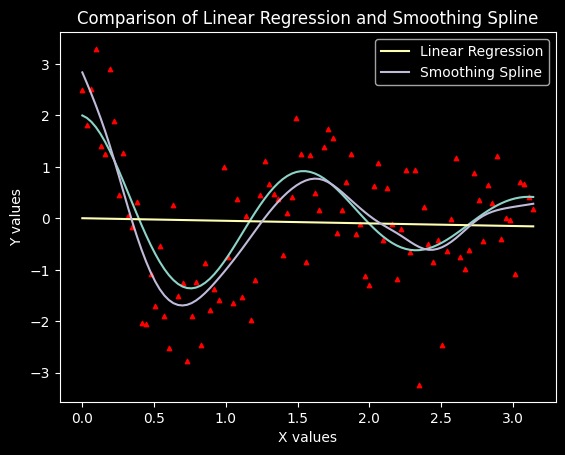

[[-0.05037094]]
[0.00273685]


In [19]:
np.random.seed(42)


def fn(x):
    lam = 0.5
    omega = 4
    return 2 * np.exp(-lam * x) * np.cos(omega * x)


xs = np.linspace(0, np.pi, 100)
plt.plot(xs, fn(xs))
ys = fn(xs) + np.random.standard_normal(xs.shape)
plt.scatter(xs, ys, marker="^", s=10, c="red")
# Simple linear regression
lr = LinearRegression()
lr.fit(X=xs.reshape(-1, 1), y=ys.reshape(-1, 1))
plt.plot(xs, lr.predict(xs.reshape(-1, 1)), label="Linear Regression")

# Smoothing spline
gam = LinearGAM(s(0)).fit(xs.reshape(-1, 1), ys)  # type: ignore
plt.plot(xs, gam.predict(xs.reshape(-1, 1)), label="Smoothing Spline")

# Add labels and legend
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Comparison of Linear Regression and Smoothing Spline")
plt.legend()
plt.show()

print(lr.coef_)
print(lr.intercept_)